### 데이터 불러오기

In [2]:
from sklearn.datasets import load_wine
raw_wine = load_wine()

## 피처, 타깃 데이터 지정

In [4]:
X = raw_wine.data
y = raw_wine.target

### 트레인/테스트 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

### 표준화

In [9]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

### PCA 차원 축소


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_tn_std)
X_tn_pca = pca.transform(X_tn_std)
X_te_pca = pca.transform(X_te_std)

### 데이터 차원 축소 확인

In [13]:
print(X_tn_pca.shape)
print(X_te_pca.shape)

(133, 2)
(45, 2)


### 공분산 행렬

In [15]:
print(pca.get_covariance())

[[ 1.09915015  0.07084878  0.29200815 -0.19021916  0.31314949  0.33631366
   0.27857191 -0.15183097  0.24675731  0.46056315 -0.08451718  0.0678613
   0.52254184]
 [ 0.07084878  0.88645357  0.15270652  0.24405452 -0.03410475 -0.3717228
  -0.4461403   0.3374758  -0.29928379  0.35254849 -0.44772203 -0.47242887
  -0.15427996]
 [ 0.29200815  0.15270652  0.71036656 -0.00831644  0.13494112  0.03441575
  -0.01708121  0.04041271  0.01649682  0.33126838 -0.18710436 -0.12411702
   0.19306093]
 [-0.19021916  0.24405452 -0.00831644  0.78863789 -0.15840422 -0.42328103
  -0.45504504  0.31926786 -0.33062168  0.07126745 -0.30244884 -0.3856564
  -0.33788566]
 [ 0.31314949 -0.03410475  0.13494112 -0.15840422  0.70900685  0.26779674
   0.25018881 -0.15571699  0.20193364  0.18990996  0.04375683  0.13559734
   0.32921721]
 [ 0.33631366 -0.3717228   0.03441575 -0.42328103  0.26779674  1.20231404
   0.72342148 -0.50434344  0.52889224 -0.07605509  0.46090655  0.60068158
   0.56048398]
 [ 0.27857191 -0.4461403 

### 고유값, 고유 벡터 확인

In [17]:
print(pca.singular_values_)
print(pca.components_)

[25.3887705  18.00040359]
[[ 0.14285263 -0.24443441 -0.01392104 -0.24517361  0.1315099   0.38923734
   0.42471766 -0.30128613  0.30523465 -0.10462106  0.30267149  0.37266737
   0.29150867]
 [-0.50194071 -0.23015832 -0.31022311  0.03872248 -0.23858952 -0.09688729
  -0.01451474 -0.03693926 -0.0584635  -0.54240798  0.28168064  0.16944035
  -0.35182263]]


### 설명되는 분산

In [19]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.88325506 2.45465553]
[0.37281068 0.18739996]


### 차원축소 데이터 확인

In [20]:
import pandas as pd
pca_columns = ['pca_comp1', 'pca_comp2']
X_tn_pca_df = pd.DataFrame(X_tn_pca, columns=pca_columns)
X_tn_pca_df['target'] = y_tn
X_tn_pca_df.head()

,pca_comp1,pca_comp2,target
0,2.128500,-1.019732,0
1,-2.948125,-0.254807,2
2,1.919795,1.337012,1
3,-2.133376,-0.945897,2
4,2.236803,-2.269839,0


### 라벨 미적용 PCA 데이터

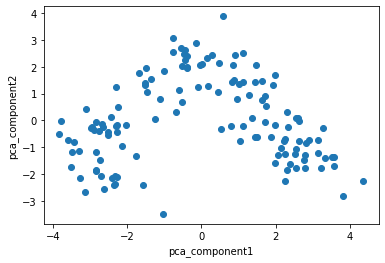

In [22]:
import matplotlib.pyplot as plt 
plt.scatter(X_tn_pca_df['pca_comp1'],
            X_tn_pca_df['pca_comp2'],
            marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

### 라벨 적용 PCA 데이터

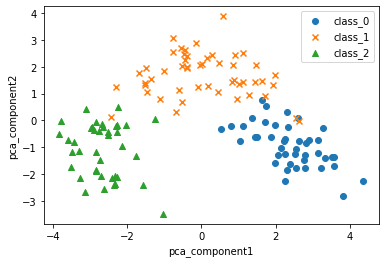

In [24]:
df = X_tn_pca_df
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_2 = df[df['target'] == 2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21,
            marker='o',
            label=target_0)

plt.scatter(X_12, X_22,
            marker='x',
            label=target_1)

plt.scatter(X_13, X_23,
            marker='^',
            label=target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

### 반복문을 이용한 PCA 시각화

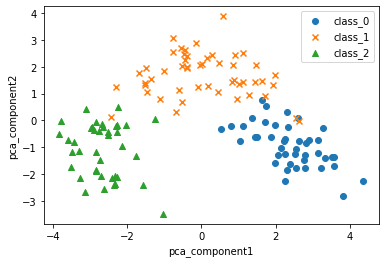

In [27]:
df = X_tn_pca_df
markers= ['o', 'x', '^']

for i, mark in enumerate(markers):
    df_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

### PCA 적용 이전 데이터 학습

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=1)
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std)

### PCA 적용 이전 데이터 예측 정확도

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9555555555555556


### PCA 적용 후 데이터 학습

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf_rf_pca = RandomForestClassifier(max_depth=2, random_state=1)
clf_rf_pca.fit(X_tn_pca, y_tn)
pred_rf_pca = clf_rf_pca.predict(X_te_pca)

### PCA 적용 후 데이터 예측 정확도

In [38]:
# PCA를 했는데 정확도가 더 올라갔다?
# https://chancoding.tistory.com/56
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_rf_pca)
accuracy

0.9777777777777777